In [5]:
# Fehlende Werte in den Eingabedaten durch den Median der jeweiligen Spalte ersetzen
from sklearn.impute import SimpleImputer

# Imputer erstellen und an die Daten anpassen
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Verwenden Sie X_imputed anstelle von X für das Modelltraining
# Das Gleiche für X_train_scaled und X_test_scaled
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

# Jetzt können Sie die Modelle mit den neuen Daten trainieren
for name, model in models.items():
    # Modell trainieren
    model.fit(X_train_scaled, y_train)

    # Vorhersagen auf den Testdaten
    y_pred = model.predict(X_test_scaled)

    # Bewertung des Modells
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Modell: {name}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R²-Score: {r2:.4f}\n")


Modell: Linear Regression
Mean Squared Error: 3.8714
R²-Score: 0.5548

Modell: k-Nearest Neighbors
Mean Squared Error: 2.1761
R²-Score: 0.7497

Modell: Random Forest Regressor
Mean Squared Error: 0.0597
R²-Score: 0.9931

Modell: Support Vector Machine
Mean Squared Error: 1.3233
R²-Score: 0.8478

Modell: XGBoost
Mean Squared Error: 0.0557
R²-Score: 0.9936



Linear Regression: MSE = 3.82, R2 = 0.56
k-Nearest Neighbors: MSE = 2.19, R2 = 0.75
Random Forest Regressor: MSE = 0.06, R2 = 0.99
Support Vector Machine: MSE = 1.32, R2 = 0.85
XGBoost: MSE = 0.06, R2 = 0.99


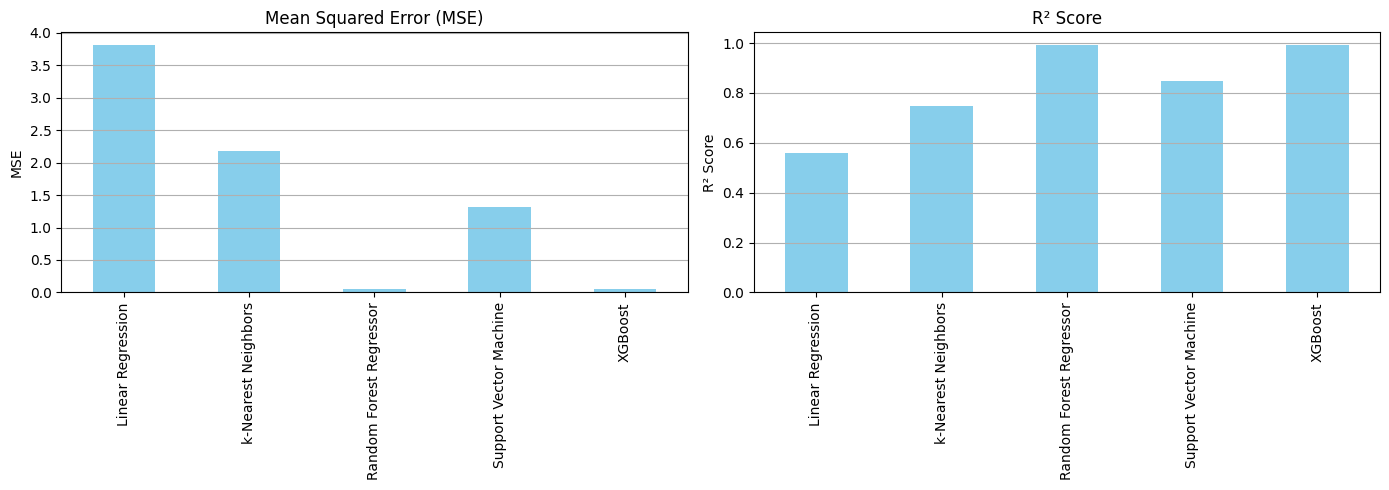

Feature Importances for Random Forest Regressor:
Caffeine_Intake_mg_normalized             0.365707
Caffeine_Intake_mg                        0.364161
Caffeine_Intake_mg_standardized           0.258937
Movement_During_Sleep                     0.001468
Movement_During_Sleep_standardized        0.001314
Sleep_Duration_Hours                      0.001308
Sleep_Duration_Hours_normalized           0.001278
Sleep_Duration_Hours_standardized         0.001186
Movement_During_Sleep_normalized          0.001144
Heart_Rate_Variability_normalized         0.000388
Bedtime_Consistency_normalized            0.000345
Bedtime_Consistency                       0.000338
Bedtime_Consistency_standardized          0.000319
Heart_Rate_Variability                    0.000310
Heart_Rate_Variability_standardized       0.000293
Light_Exposure_hours_normalized           0.000275
Light_Exposure_hours                      0.000273
Light_Exposure_hours_standardized         0.000242
Caffeine_Squared_Smoothed        

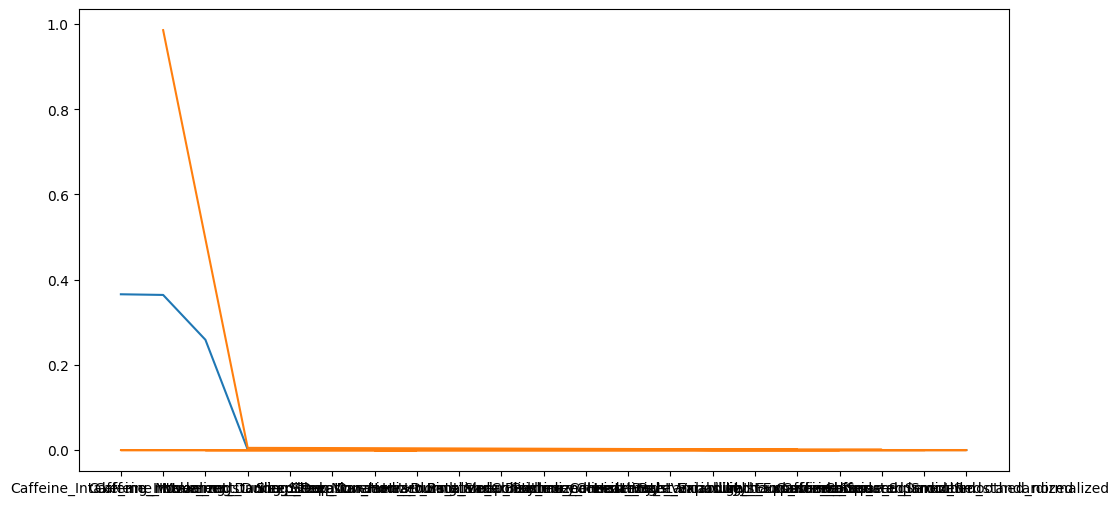

In [9]:
# Bibliotheken importieren
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Daten einlesen
df = pd.read_csv('/Users/tommygrace/Desktop/sleep_quality_project/notebooks/final_dataset_with_normalized_and_standardized_features.csv')

# Zielvariable und Features definieren
X = df.drop(columns=['Sleep_Quality_Score'])
y = df['Sleep_Quality_Score']

# Fehlende Werte in den Eingabedaten durch den Median der jeweiligen Spalte ersetzen
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Skalierung der Daten
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelle definieren
models = {
    "Linear Regression": LinearRegression(),
    "k-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(kernel='rbf'),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Ergebnisse speichern
results = {}

# Modelle trainieren und testen
for name, model in models.items():
    # Modell trainieren
    model.fit(X_train_scaled, y_train)
    
    # Vorhersagen auf den Testdaten
    y_pred = model.predict(X_test_scaled)
    
    # Berechnung der Metriken
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Ergebnisse speichern
    results[name] = {"MSE": mse, "R2": r2}
    
    # Ergebnis anzeigen
    print(f"{name}: MSE = {mse:.2f}, R2 = {r2:.2f}")

# Ergebnisse als DataFrame
results_df = pd.DataFrame(results).T

# Ergebnisse visualisieren
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# MSE vergleichen
results_df['MSE'].plot(kind='bar', ax=axes[0], title='Mean Squared Error (MSE)', color='skyblue')
axes[0].set_ylabel('MSE')
axes[0].grid(axis='y')

# R2 vergleichen
results_df['R2'].plot(kind='bar', ax=axes[1], title='R² Score', color='skyblue')
axes[1].set_ylabel('R² Score')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

# Analyse der Feature Importance für Random Forest und XGBoost
important_features = {}

for name in ["Random Forest Regressor", "XGBoost"]:
    model = models[name]
    feature_importances = model.feature_importances_
    important_features[name] = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

# Feature Importances anzeigen
for name, feature_importance in important_features.items(): 
    print(f"Feature Importances for {name}:")
    print(feature_importance)
    print("\n")

# Visualisierung der Feature Importances
plt.figure(figsize=(12, 6))
for name, feature_importance in important_features.items():
    plt.plot(feature_importance, label=name)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Random Forest nach Hyperparameter-Tuning:
Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.25
Mean Absolute Error (MAE): 0.10
R²-Score: 0.99
Adjusted R²-Score: 0.99

Vorhersage der Schlafqualität (Testdaten):
   Predicted_Score Predicted_Category
0         1.473297  schlechter Schlaf
1         1.000000  schlechter Schlaf
2         1.000000  schlechter Schlaf
3         1.000000  schlechter Schlaf
4         1.079038  schlechter Schlaf
5         1.000000  schlechter Schlaf
6         1.000000  schlechter Schlaf
7         1.000000  schlechter Schlaf
8         1.542579  schlechter Schlaf
9         1.000000  schlechter Schlaf


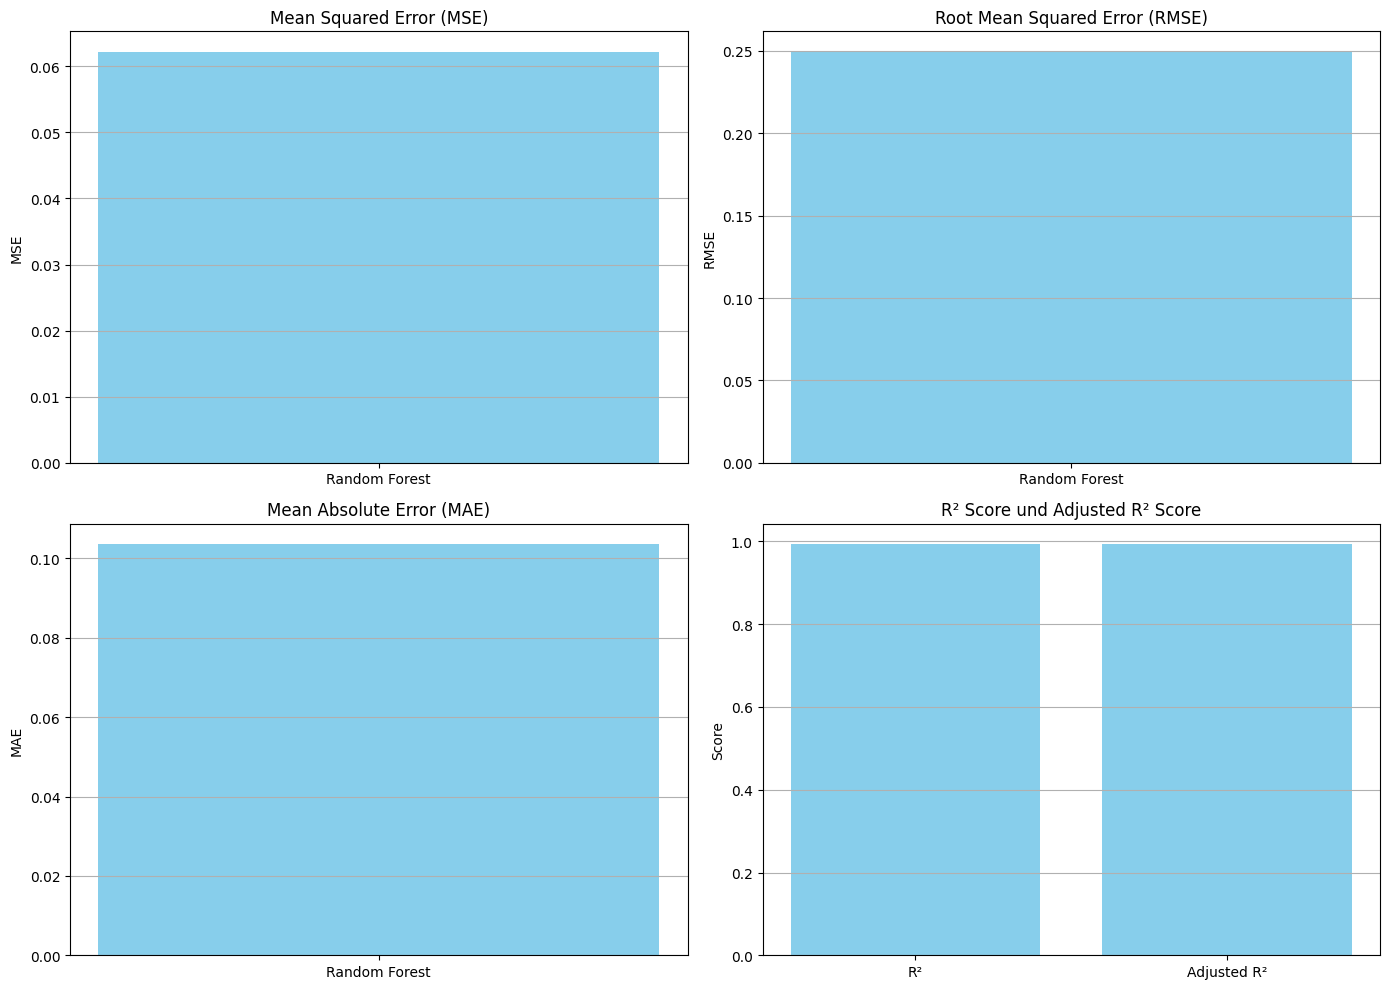

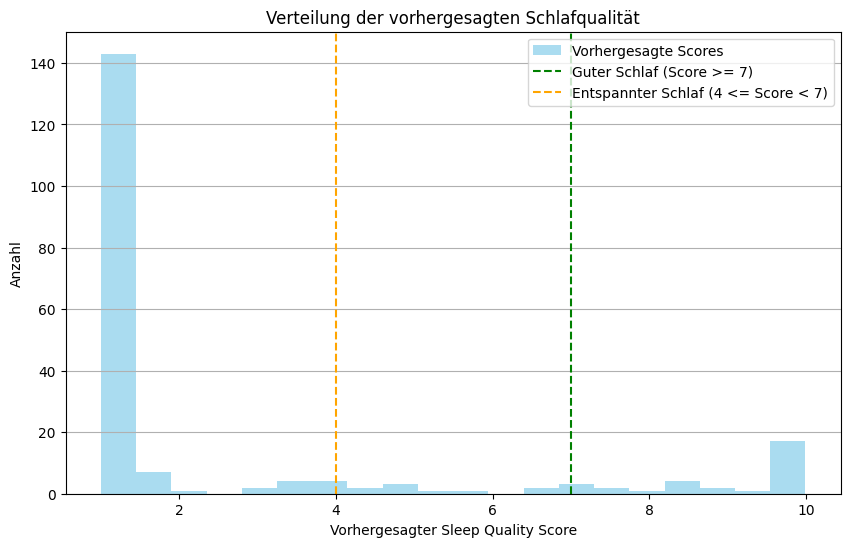

In [3]:
# Bibliotheken importieren
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import matplotlib.pyplot as plt

# Daten einlesen
df = pd.read_csv('/Users/tommygrace/Desktop/sleep_quality_project/data/final_dataset_with_normalized_and_standardized_features.csv')

# Entfernen der normalisierten/standardisierten Versionen
df = df[['Caffeine_Intake_mg', 'Movement_During_Sleep', 'Sleep_Duration_Hours', 
         'Light_Exposure_hours', 'Bedtime_Consistency', 'Heart_Rate_Variability', 
         'Caffeine_Squared_Smoothed', 'Sleep_Quality_Score']]

# Zielvariable und Features definieren
X = df.drop(columns=['Sleep_Quality_Score'])
y = df['Sleep_Quality_Score']

# Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalierung der Daten
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter-Tuning für Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Bestes Modell für Random Forest
best_rf = grid_search_rf.best_estimator_

# Vorhersagen auf den Testdaten
y_pred_rf = best_rf.predict(X_test_scaled)

# Berechnung der Metriken
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_rf = 1 - (1 - r2_rf) * (n - 1) / (n - p - 1)

# Ergebnis anzeigen
print(f"Random Forest nach Hyperparameter-Tuning:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R²-Score: {r2_rf:.2f}")
print(f"Adjusted R²-Score: {adjusted_r2_rf:.2f}")

# Überprüfung der Vorhersagen für gute Schlafqualität
# Kategorisierung der Schlafqualität
y_pred_categories = ["guter Schlaf" if score >= 7 else "entspannter Schlaf" if 4 <= score < 7 else "schlechter Schlaf" for score in y_pred_rf]

# Ergebnis anzeigen
predicted_results = pd.DataFrame({'Predicted_Score': y_pred_rf, 'Predicted_Category': y_pred_categories})
print("\nVorhersage der Schlafqualität (Testdaten):")
print(predicted_results.head(10))

# Ergebnisse visualisieren
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# MSE visualisieren
axes[0, 0].bar(['Random Forest'], [mse_rf], color='skyblue')
axes[0, 0].set_title('Mean Squared Error (MSE)')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].grid(axis='y')

# RMSE visualisieren
axes[0, 1].bar(['Random Forest'], [rmse_rf], color='skyblue')
axes[0, 1].set_title('Root Mean Squared Error (RMSE)')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].grid(axis='y')

# MAE visualisieren
axes[1, 0].bar(['Random Forest'], [mae_rf], color='skyblue')
axes[1, 0].set_title('Mean Absolute Error (MAE)')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].grid(axis='y')

# R² und Adjusted R² visualisieren
axes[1, 1].bar(['R²', 'Adjusted R²'], [r2_rf, adjusted_r2_rf], color='skyblue')
axes[1, 1].set_title('R² Score und Adjusted R² Score')
axes[1, 1].set_ylabel('Score')
axes[1, 1].grid(axis='y')

plt.tight_layout()
plt.show()

# Visualisierung der Verteilung der vorhergesagten Schlafqualität
plt.figure(figsize=(10, 6))
plt.hist(y_pred_rf, bins=20, alpha=0.7, label='Vorhergesagte Scores', color='skyblue')
plt.axvline(x=7, color='green', linestyle='--', label='Guter Schlaf (Score >= 7)')
plt.axvline(x=4, color='orange', linestyle='--', label='Entspannter Schlaf (4 <= Score < 7)')
plt.xlabel('Vorhergesagter Sleep Quality Score')
plt.ylabel('Anzahl')
plt.title('Verteilung der vorhergesagten Schlafqualität')
plt.legend()
plt.grid(axis='y')
plt.show()
